# CNBC Article 1: Black Friday shoppers spent a record $9.8 billion in U.S. online sales, up 7.5% from last year

In [56]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from bs4 import BeautifulSoup
import pandas as pd

# Set up Edge WebDriver
options = webdriver.EdgeOptions()
options.add_argument("--headless")  # Runs without opening Edge window
service = Service(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service, options=options)

# Article URL
url = "https://www.cnbc.com/2023/11/25/black-friday-shoppers-spent-a-record-9point8-billion-in-us-online-sales-up-7point5percent-from-last-year.html"

# Open the webpage
driver.get(url)

# Let page fully load (adjust delay if needed)
import time
time.sleep(5)

# Extract page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# Close browser
driver.quit()

# Extract title
title = soup.find("h1").text if soup.find("h1") else "Title Not Found"

# Extract article text from <div class="group">
content_divs = soup.find_all("div", class_="group")
article_text = " ".join([div.text for div in content_divs])

# Store in DataFrame and save
df = pd.DataFrame({"Title": [title], "URL": [url], "Text": [article_text]})
df.to_csv("black_friday_article_cnbc1.csv", index=False)

print("Article saved to CSV successfully")

Article saved to CSV successfully


In [57]:
import re
import pandas as pd

# Load the scraped article
df = pd.read_csv("black_friday_article_cnbc1.csv")
article_text = df.loc[0, "Text"]  # Extract text from CSV

# Cleaning function
def clean_text(text):
    text = re.sub(r"\s+", " ", text)  # Remove excessive spaces and line breaks
    text = re.sub(r"[^a-zA-Z0-9.,!?$%\s]", "", text)  # Remove special characters
    text = re.sub(r"\b(Advertisement|By .*?CNBC)\b", "", text, flags=re.IGNORECASE)  # Remove ads/authors
    return text.strip()

# Apply cleaning
cleaned_text = clean_text(article_text)

# Save cleaned text
df["Cleaned_Text"] = cleaned_text
df.to_csv("black_friday_article_cleaned_cnbc1.csv", index=False)

print("Cleaned text saved successfully")

Cleaned text saved successfully


In [59]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK VADER lexicon
nltk.download('vader_lexicon')

# Load cleaned article
df = pd.read_csv("black_friday_article_cleaned_cnbc1.csv")
article_text = df.loc[0, "Cleaned_Text"]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [61]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)['compound']
    label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    return score, label

def analyze_sentiment_textblob(text):
    score = TextBlob(text).sentiment.polarity
    label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    return score, label

# Apply analysis
vader_score, vader_label = analyze_sentiment_vader(article_text)
textblob_score, textblob_label = analyze_sentiment_textblob(article_text)

# Store results
df["VADER_Score"] = vader_score
df["VADER_Label"] = vader_label
df["TextBlob_Score"] = textblob_score
df["TextBlob_Label"] = textblob_label

print(f"VADER Sentiment: {vader_label} (Score: {vader_score})")
print(f"TextBlob Sentiment: {textblob_label} (Score: {textblob_score})")

VADER Sentiment: Positive (Score: 0.988)
TextBlob Sentiment: Positive (Score: 0.1303085519922255)


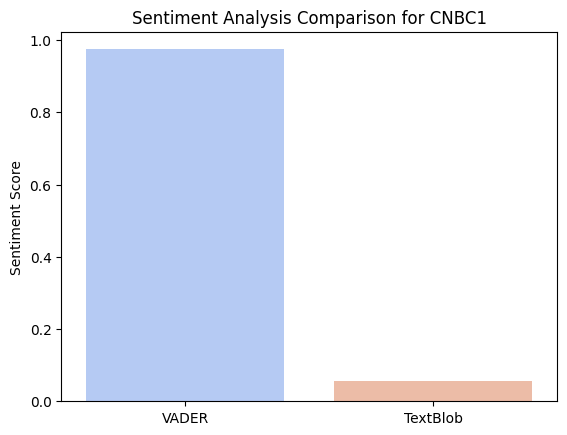

In [74]:
# Create sentiment comparison plot
sns.barplot(x=["VADER", "TextBlob"], y=[vader_score, textblob_score], hue=["VADER", "TextBlob"], dodge=False, legend=False, palette="coolwarm")
plt.title("Sentiment Analysis Comparison for CNBC1")
plt.ylabel("Sentiment Score")
plt.show()

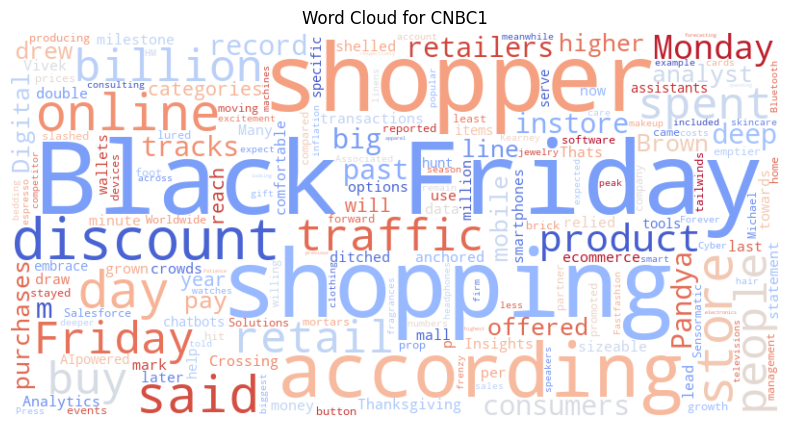

In [84]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define custom words to ignore
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["CNBC", "Adobe"])

# Create Word Cloud with ignored words
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="coolwarm", stopwords=custom_stopwords
).generate(article_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("Word Cloud for CNBC1")
plt.show()

# CNBC Article 2: Are Black Friday deals worth waiting for? Here’s what to expect this year

In [87]:
# Set up Edge WebDriver
options = webdriver.EdgeOptions()
options.add_argument("--headless")  # Runs without opening Edge window
service = Service(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service, options=options)

# Article URL
url = "https://www.cnbc.com/2024/11/16/black-friday-deals-and-discounts-to-expect-this-season.html?&qsearchterm=black%20friday"

# Open the webpage
driver.get(url)

# Let page fully load (adjust delay if needed)
import time
time.sleep(5)

# Extract page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# Close browser
driver.quit()

# Extract title
title = soup.find("h1").text if soup.find("h1") else "Title Not Found"

# Extract article text from <div class="group">
content_divs = soup.find_all("div", class_="group")
article_text = " ".join([div.text for div in content_divs])

# Store in DataFrame and save
df = pd.DataFrame({"Title": [title], "URL": [url], "Text": [article_text]})
df.to_csv("black_friday_article_cnbc2.csv", index=False)

print("Article saved to CSV successfully")

Article saved to CSV successfully


In [89]:
# Load the scraped article
df = pd.read_csv("black_friday_article_cnbc2.csv")
article_text = df.loc[0, "Text"]  # Extract text from CSV

# Cleaning function
def clean_text(text):
    text = re.sub(r"\s+", " ", text)  # Remove excessive spaces and line breaks
    text = re.sub(r"[^a-zA-Z0-9.,!?$%\s]", "", text)  # Remove special characters
    text = re.sub(r"\b(Advertisement|By .*?NPR)\b", "", text, flags=re.IGNORECASE)  # Remove ads/authors
    return text.strip()

# Apply cleaning
cleaned_text = clean_text(article_text)

# Save cleaned text
df["Cleaned_Text"] = cleaned_text
df.to_csv("black_friday_article_cleaned_cnbc2.csv", index=False)

print("Cleaned text saved successfully")

Cleaned text saved successfully


VADER Sentiment: Positive (Score: 0.999)
TextBlob Sentiment: Positive (Score: 0.16967687628977957)


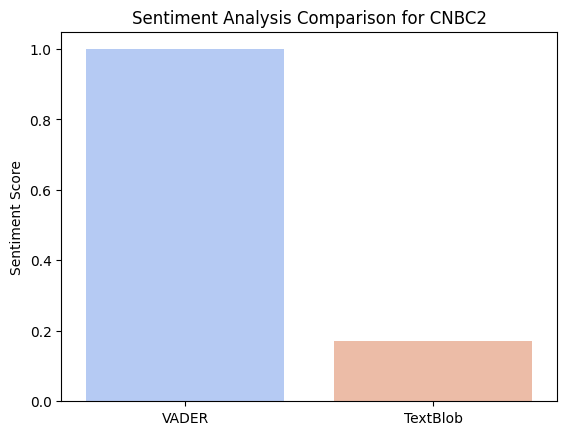

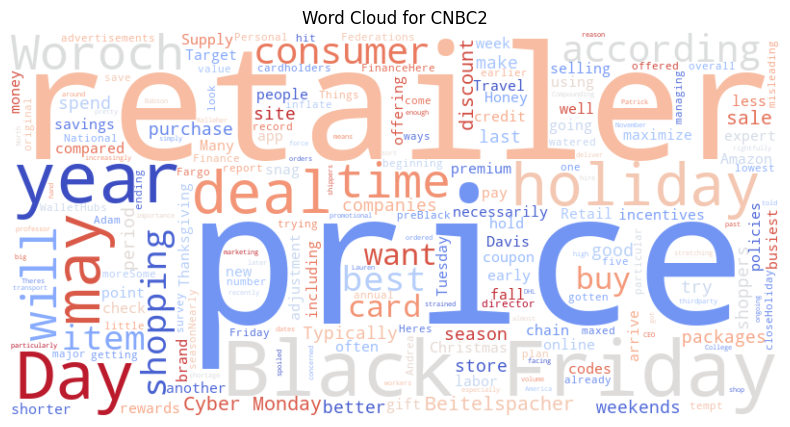

In [91]:
# Load cleaned article
df = pd.read_csv("black_friday_article_cleaned_cnbc2.csv")
article_text = df.loc[0, "Cleaned_Text"]

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)['compound']
    label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    return score, label

def analyze_sentiment_textblob(text):
    score = TextBlob(text).sentiment.polarity
    label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    return score, label

# Apply analysis
vader_score, vader_label = analyze_sentiment_vader(article_text)
textblob_score, textblob_label = analyze_sentiment_textblob(article_text)

# Store results
df["VADER_Score"] = vader_score
df["VADER_Label"] = vader_label
df["TextBlob_Score"] = textblob_score
df["TextBlob_Label"] = textblob_label

print(f"VADER Sentiment: {vader_label} (Score: {vader_score})")
print(f"TextBlob Sentiment: {textblob_label} (Score: {textblob_score})")

# Create sentiment comparison plot
sns.barplot(x=["VADER", "TextBlob"], y=[vader_score, textblob_score], hue=["VADER", "TextBlob"], dodge=False, legend=False, palette="coolwarm")
plt.title("Sentiment Analysis Comparison for CNBC2")
plt.ylabel("Sentiment Score")
plt.show()

# Load cleaned article text
df = pd.read_csv("black_friday_article_cleaned_cnbc2.csv")
article_text = df.loc[0, "Cleaned_Text"]  # Extract text

# Define custom words to ignore
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["CNBC", "Adobe", "said"])  # Adjust as needed

# Create Word Cloud with ignored words
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="coolwarm", stopwords=custom_stopwords
).generate(article_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("Word Cloud for CNBC2")
plt.show()

# NPR Article: Most Black Friday shoppers bagged their deals online this year, with record spending

In [88]:
# Load the scraped article
df = pd.read_csv("black_friday_article_cnbc2.csv")
article_text = df.loc[0, "Text"]  # Extract text from CSV

# Cleaning function
def clean_text(text):
    text = re.sub(r"\s+", " ", text)  # Remove excessive spaces and line breaks
    text = re.sub(r"[^a-zA-Z0-9.,!?$%\s]", "", text)  # Remove special characters
    text = re.sub(r"\b(Advertisement|By .*?NPR)\b", "", text, flags=re.IGNORECASE)  # Remove ads/authors
    return text.strip()

# Apply cleaning
cleaned_text = clean_text(article_text)

# Save cleaned text
df["Cleaned_Text"] = cleaned_text
df.to_csv("black_friday_article_cleaned_cnbc2.csv", index=False)

print("Cleaned text saved successfully")

Cleaned text saved successfully


In [64]:
# Set up Edge WebDriver
options = webdriver.EdgeOptions()
options.add_argument("--headless")  # Runs without opening Edge window
service = Service(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service, options=options)

# Article URL
url = "https://www.npr.org/2024/12/01/g-s1-36310/black-friday-cyber-monday-record-spending"

# Open the webpage
driver.get(url)

# Wait for dynamic content to load
time.sleep(5)

# Extract page source and parse with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# Close browser
driver.quit()

# Extract title
title = soup.find("h1").text if soup.find("h1") else "Title Not Found"

# Locate parent div (div[4])
parent_div = soup.select_one("body main div:nth-of-type(2) section article div:nth-of-type(4)")

if parent_div:
    # Find all <p> tags *after* the first nested div
    paragraphs = parent_div.find_all("p", recursive=False)  # Avoid diving into other nested divs
    article_text = " ".join([p.text for p in paragraphs])
else:
    article_text = "Article text not found."

# Store in DataFrame and save
df = pd.DataFrame({"Title": [title], "URL": [url], "Text": [article_text]})
df.to_csv("black_friday_article_npr.csv", index=False)

print("Article saved to CSV successfully")

Article saved to CSV successfully


In [71]:
# Load the scraped article
df = pd.read_csv("black_friday_article_npr.csv")
article_text = df.loc[0, "Text"]  # Extract text from CSV

# Cleaning function
def clean_text(text):
    text = re.sub(r"\s+", " ", text)  # Remove excessive spaces and line breaks
    text = re.sub(r"[^a-zA-Z0-9.,!?$%\s]", "", text)  # Remove special characters
    text = re.sub(r"\b(Advertisement|By .*?NPR)\b", "", text, flags=re.IGNORECASE)  # Remove ads/authors
    return text.strip()

# Apply cleaning
cleaned_text = clean_text(article_text)

# Save cleaned text
df["Cleaned_Text"] = cleaned_text
df.to_csv("black_friday_article_cleaned_npr.csv", index=False)

print("Cleaned text saved successfully")

Cleaned text saved successfully


VADER Sentiment: Positive (Score: 0.9745)
TextBlob Sentiment: Positive (Score: 0.05735071806500379)


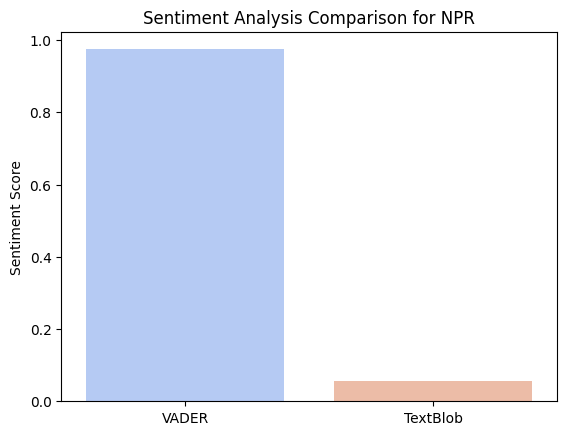

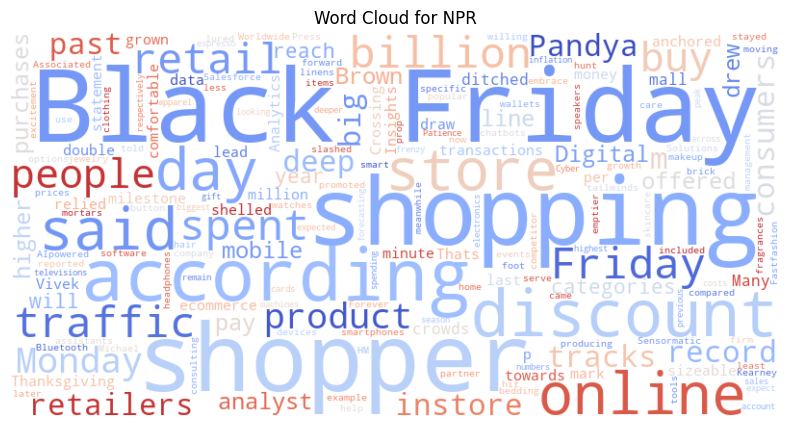

In [92]:
# Load cleaned article
df = pd.read_csv("black_friday_article_cleaned_npr.csv")
article_text = df.loc[0, "Cleaned_Text"]

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)['compound']
    label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    return score, label

def analyze_sentiment_textblob(text):
    score = TextBlob(text).sentiment.polarity
    label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    return score, label

# Apply analysis
vader_score, vader_label = analyze_sentiment_vader(article_text)
textblob_score, textblob_label = analyze_sentiment_textblob(article_text)

# Store results
df["VADER_Score"] = vader_score
df["VADER_Label"] = vader_label
df["TextBlob_Score"] = textblob_score
df["TextBlob_Label"] = textblob_label

print(f"VADER Sentiment: {vader_label} (Score: {vader_score})")
print(f"TextBlob Sentiment: {textblob_label} (Score: {textblob_score})")

# Create sentiment comparison plot
sns.barplot(x=["VADER", "TextBlob"], y=[vader_score, textblob_score], hue=["VADER", "TextBlob"], dodge=False, legend=False, palette="coolwarm")
plt.title("Sentiment Analysis Comparison for NPR")
plt.ylabel("Sentiment Score")
plt.show()

# Load cleaned article text
df = pd.read_csv("black_friday_article_cleaned_npr.csv")
article_text = df.loc[0, "Cleaned_Text"]  # Extract text

# Define custom words to ignore
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["NPR", "Adobe"])  # Adjust as needed

# Create Word Cloud with ignored words
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="coolwarm", stopwords=custom_stopwords
).generate(article_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("Word Cloud for NPR")
plt.show()

# CNN Article: Shoppers continue indulging in Black Friday sales, but mostly online

In [101]:
# Set up Edge WebDriver
options = webdriver.EdgeOptions()
options.add_argument("--headless")
service = Service(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service, options=options)

# Article URL
url = "https://www.cnn.com/2024/12/01/business/black-friday-holiday-shopping/index.html"

driver.get(url)  # Open the webpage
time.sleep(5)  # Wait for content to fully load

# Extract page source and parse
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()  # Close browser

# Extract title
title = soup.find("h1").text if soup.find("h1") else "Title Not Found"

# Locate all <p> tags with the specific class
paragraphs = soup.find_all("p", class_="paragraph inline-placeholder vossi-paragraph")
article_text = " ".join([p.text.strip() for p in paragraphs]) if paragraphs else "Article text not found."

# Store in DataFrame and save
df = pd.DataFrame({"Title": [title], "URL": [url], "Text": [article_text]})
df.to_csv("black_friday_article_cnn.csv", index=False)

print("Article saved to CSV successfully")

Article saved to CSV successfully


In [103]:
# Load the scraped article
df = pd.read_csv("black_friday_article_cnn.csv")
article_text = df.loc[0, "Text"]  # Extract text from CSV

# Cleaning function
def clean_text(text):
    text = re.sub(r"\s+", " ", text)  # Remove excessive spaces and line breaks
    text = re.sub(r"[^a-zA-Z0-9.,!?$%\s]", "", text)  # Remove special characters
    text = re.sub(r"\b(Advertisement|By .*?CNN)\b", "", text, flags=re.IGNORECASE)  # Remove ads/authors
    return text.strip()

# Apply cleaning
cleaned_text = clean_text(article_text)

# Save cleaned text
df["Cleaned_Text"] = cleaned_text
df.to_csv("black_friday_article_cleaned_cnn.csv", index=False)

print("Cleaned text saved successfully")

Cleaned text saved successfully


VADER Sentiment: Positive (Score: 0.9662)
TextBlob Sentiment: Positive (Score: 0.17811310782241013)


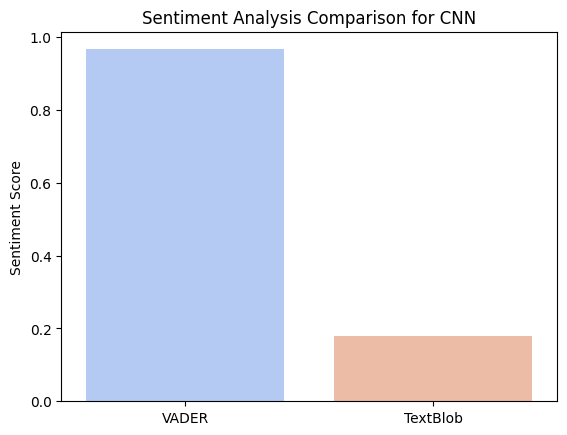

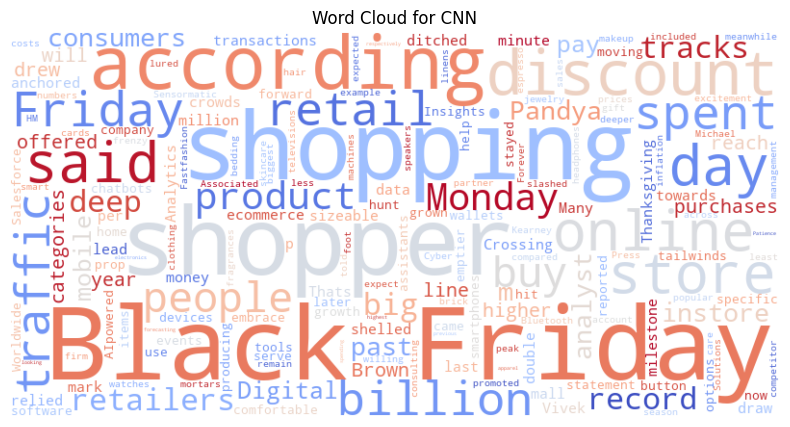

In [105]:
# Load cleaned article
df = pd.read_csv("black_friday_article_cleaned_cnn.csv")
article_text = df.loc[0, "Cleaned_Text"]

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)['compound']
    label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    return score, label

def analyze_sentiment_textblob(text):
    score = TextBlob(text).sentiment.polarity
    label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    return score, label

# Apply analysis
vader_score, vader_label = analyze_sentiment_vader(article_text)
textblob_score, textblob_label = analyze_sentiment_textblob(article_text)

# Store results
df["VADER_Score"] = vader_score
df["VADER_Label"] = vader_label
df["TextBlob_Score"] = textblob_score
df["TextBlob_Label"] = textblob_label

print(f"VADER Sentiment: {vader_label} (Score: {vader_score})")
print(f"TextBlob Sentiment: {textblob_label} (Score: {textblob_score})")

# Create sentiment comparison plot
sns.barplot(x=["VADER", "TextBlob"], y=[vader_score, textblob_score], hue=["VADER", "TextBlob"], dodge=False, legend=False, palette="coolwarm")
plt.title("Sentiment Analysis Comparison for CNN")
plt.ylabel("Sentiment Score")
plt.show()

# Load cleaned article text
df = pd.read_csv("black_friday_article_cleaned_npr.csv")
article_text = df.loc[0, "Cleaned_Text"]  # Extract text

# Define custom words to ignore
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["CNN", "Adobe"])

# Create Word Cloud with ignored words
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="coolwarm", stopwords=custom_stopwords
).generate(article_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("Word Cloud for CNN")
plt.show()